In [1]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
PROJECT_ROOT = "/content/drive/MyDrive/virtual_tryon_project"
DATA_ROOT = f"{PROJECT_ROOT}/data/viton_hd"
TRAIN_ROOT = f"{DATA_ROOT}/train"

(np.float64(-0.5), np.float64(767.5), np.float64(1023.5), np.float64(-0.5))

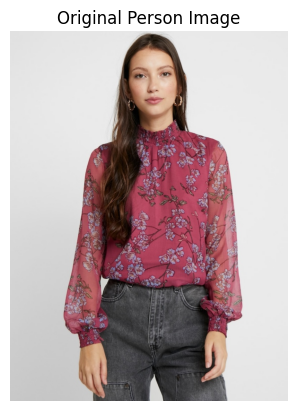

In [3]:
sample_id = "13445_00"

person_path = f"{TRAIN_ROOT}/image/{sample_id}.jpg"
person_img = Image.open(person_path).convert("RGB")

plt.imshow(person_img)
plt.title("Original Person Image")
plt.axis("off")

(np.float64(-0.5), np.float64(767.5), np.float64(1023.5), np.float64(-0.5))

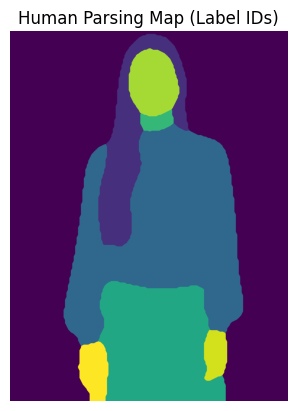

In [4]:
parse_path = f"{TRAIN_ROOT}/image-parse-v3/{sample_id}.png"
parse_img = Image.open(parse_path)
parse_np = np.array(parse_img)

plt.imshow(parse_np)
plt.title("Human Parsing Map (Label IDs)")
plt.axis("off")

(np.float64(-0.5), np.float64(767.5), np.float64(1023.5), np.float64(-0.5))

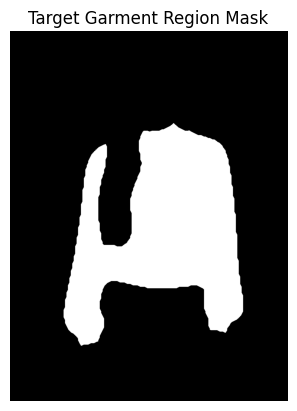

In [5]:
UPPER_CLOTH_LABELS = [5, 6]  # upper-clothes, dress
garment_region_mask = np.isin(parse_np, UPPER_CLOTH_LABELS).astype(np.uint8)

plt.imshow(garment_region_mask, cmap="gray")
plt.title("Target Garment Region Mask")
plt.axis("off")

(np.float64(-0.5), np.float64(767.5), np.float64(1023.5), np.float64(-0.5))

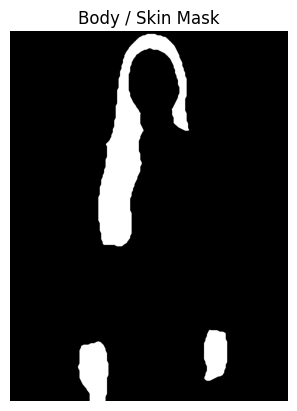

In [6]:
BODY_LABELS = [2, 14, 15]  # face, left arm, right arm
body_mask = np.isin(parse_np, BODY_LABELS).astype(np.uint8)

plt.imshow(body_mask, cmap="gray")
plt.title("Body / Skin Mask")
plt.axis("off")

(np.float64(-0.5), np.float64(767.5), np.float64(1023.5), np.float64(-0.5))

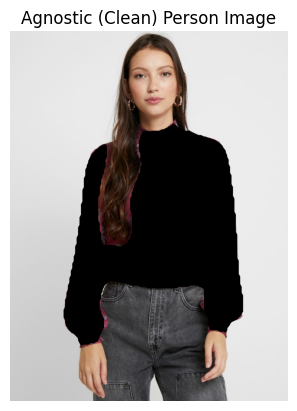

In [7]:
person_np = np.array(person_img)
agnostic_np = person_np.copy()

agnostic_np[garment_region_mask == 1] = 0

agnostic_img = Image.fromarray(agnostic_np)

plt.imshow(agnostic_img)
plt.title("Agnostic (Clean) Person Image")
plt.axis("off")

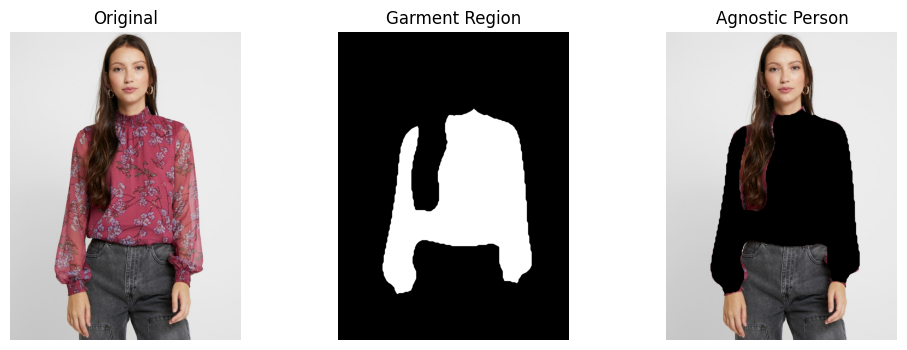

In [8]:
plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.imshow(person_img)
plt.title("Original")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(garment_region_mask, cmap="gray")
plt.title("Garment Region")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(agnostic_img)
plt.title("Agnostic Person")
plt.axis("off")

plt.show()

**Densepose**

(np.float64(-0.5), np.float64(767.5), np.float64(1023.5), np.float64(-0.5))

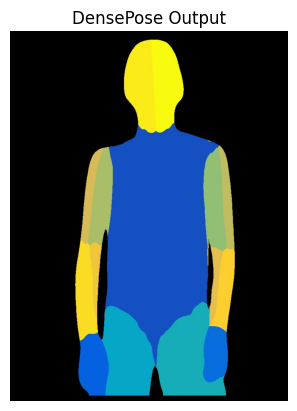

In [12]:
densepose_path = f"{TRAIN_ROOT}/image-densepose/{sample_id}.jpg"
densepose_img = Image.open(densepose_path)

plt.imshow(densepose_img)
plt.title("DensePose Output")
plt.axis("off")

(np.float64(-0.5), np.float64(767.5), np.float64(1023.5), np.float64(-0.5))

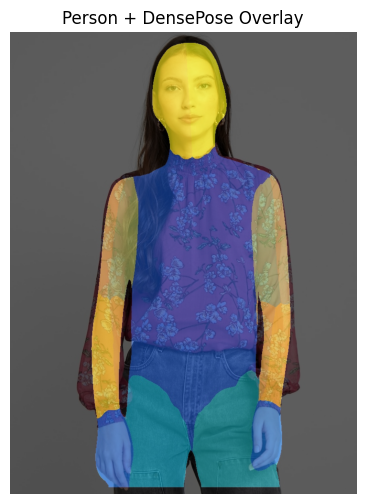

In [13]:
plt.figure(figsize=(6,6))
plt.imshow(person_img)
plt.imshow(densepose_img, alpha=0.6)
plt.title("Person + DensePose Overlay")
plt.axis("off")

In [15]:
!git clone https://github.com/rahul-ks04/virtual-tryon.git

Cloning into 'virtual-tryon'...
remote: Enumerating objects: 26, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 26 (delta 6), reused 7 (delta 2), pack-reused 0 (from 0)
Receiving objects: 100% (26/26), 9.19 KiB | 9.19 MiB/s, done.
Resolving deltas: 100% (6/6), done.


In [ ]:
%cd